Dataset Overview:
              Medicine Name  \
0   Avastin 400mg Injection   
1  Augmentin 625 Duo Tablet   
2       Azithral 500 Tablet   
3          Ascoril LS Syrup   
4         Aciloc 150 Tablet   

                                         Composition  \
0                                Bevacizumab (400mg)   
1    Amoxycillin  (500mg) +  Clavulanic Acid (125mg)   
2                               Azithromycin (500mg)   
3  Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...   
4                                 Ranitidine (150mg)   

                                                Uses  \
0   Cancer of colon and rectum Non-small cell lun...   
1                  Treatment of Bacterial infections   
2                  Treatment of Bacterial infections   
3                      Treatment of Cough with mucus   
4  Treatment of Gastroesophageal reflux disease (...   

                                        Side_effects  \
0  Rectal bleeding Taste change Headache Noseblee...   
1  Vomiti

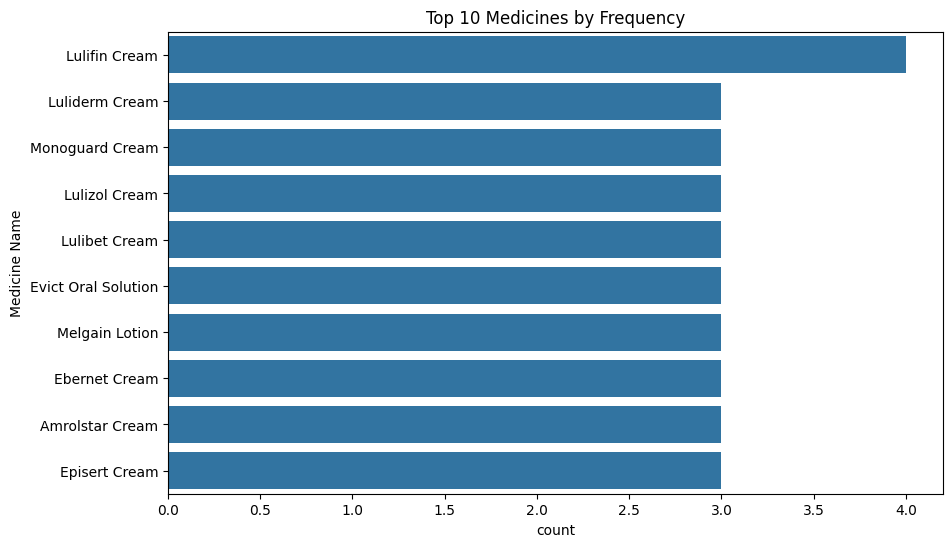

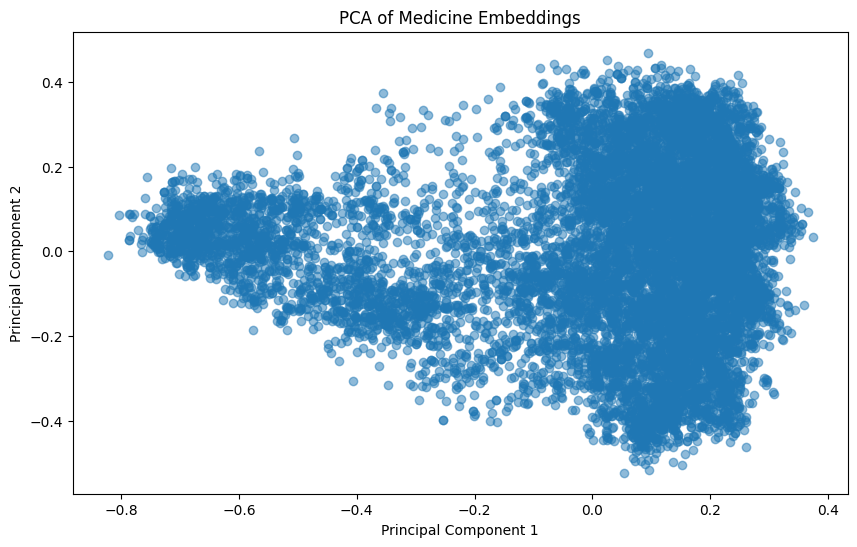

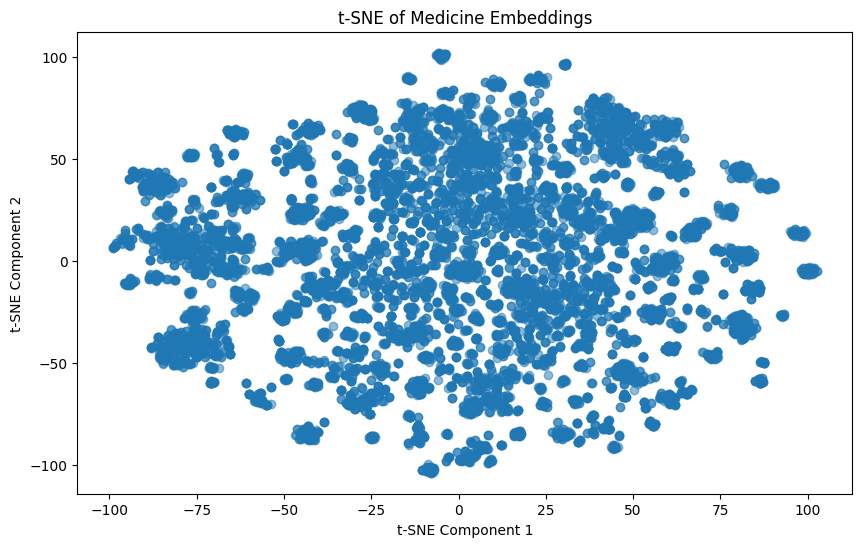


Query: headache relief


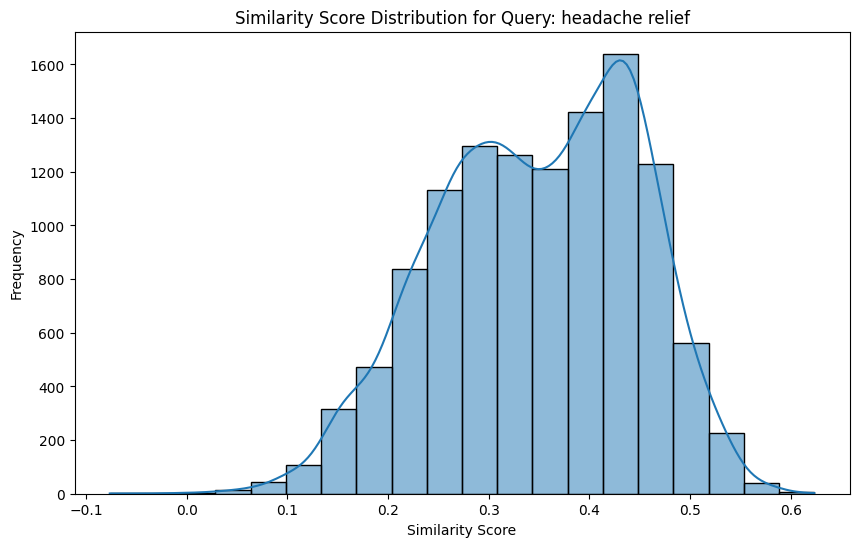


Top 5 Results:
          Medicine Name                                       Side_effects  \
3455     Hepcvel Tablet                                 Headache Tiredness   
5495   Myhep All Tablet                                 Headache Tiredness   
979   Altonil Tablet MD                                Headache Drowsiness   
9847   Tazzle 20 Tablet  Flushing sense of warmth in the face ears neck...   
5120  Megalis 20 Tablet  Flushing sense of warmth in the face ears neck...   

      similarity  
3455    0.623293  
5495    0.614728  
979     0.592329  
9847    0.592101  
5120    0.591959  

Query: fever medicine


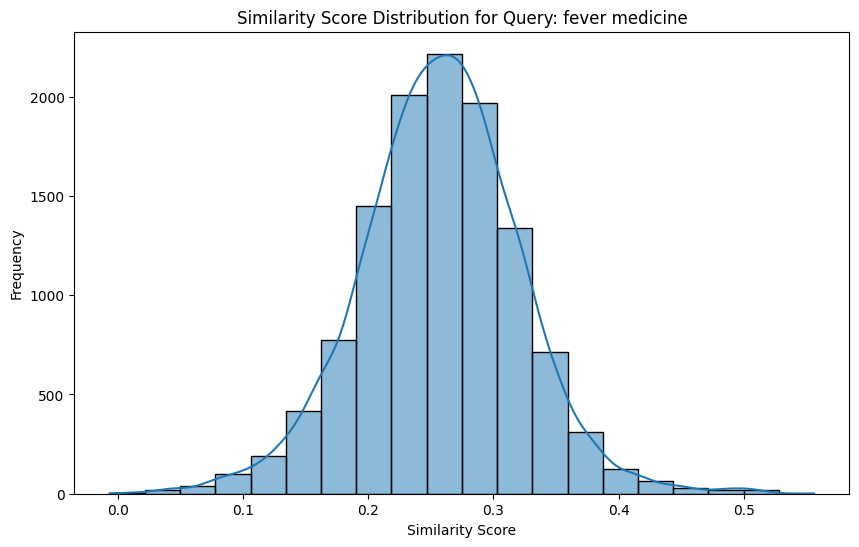


Top 5 Results:
                                          Medicine Name  \
2601                                     Fever-X Tablet   
5586         Mucinac 200 Effervescent Tablet Sugar Free   
1512                                     Dobest Capsule   
5113  Mucinac 600 Effervescent Tablet Orange Sugar Free   
7825                                    Priorix Vaccine   

                                           Side_effects  similarity  
2601                       Stomach pain Nausea Vomiting    0.556084  
5586  Fever Nausea Vomiting Rash Gastrointestinal di...    0.527128  
1512                    Skin rash Fever Nausea Vomiting    0.519358  
5113  Fever Nausea Vomiting Rash Gastrointestinal di...    0.516702  
7825                 Rash Injection site soreness Fever    0.514932  

Query: nausea treatment


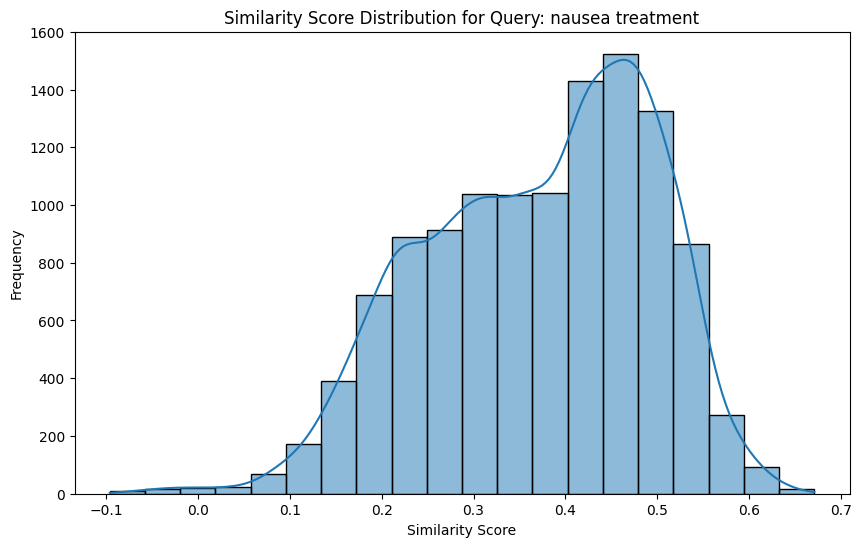


Top 5 Results:
          Medicine Name              Side_effects  similarity
5910     Myofest Tablet           Nausea Vomiting    0.671379
737   Apraize 20 Tablet  Diarrhea Nausea Vomiting    0.661728
5753      Maxoza Powder           Nausea Vomiting    0.651296
643   Apraize 10 Tablet  Diarrhea Nausea Vomiting    0.649326
476      Ageless Tablet           Nausea Vomiting    0.648848


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer, util

# Load the dataset
df = pd.read_csv('c:/Users/mayank.c/OneDrive - Optimus Information Inc/Desktop/Chatbot_Project/Chatbot/MedicalFiles/Medicine_Details.csv')

# Analyze the dataset
def analyze_dataset(df):
    print("Dataset Overview:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nUnique Medicines:", df['Medicine Name'].nunique())
    print("\nUnique Side Effects:", df['Side_effects'].nunique())

    # Plot the top 10 medicines by frequency
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['Medicine Name'], order=df['Medicine Name'].value_counts().index[:10])
    plt.title("Top 10 Medicines by Frequency")
    plt.show()

# Analyze embeddings using PCA and t-SNE
def analyze_embeddings(df, model):
    df['search_text'] = df['Medicine Name'].fillna('') + " " + df['Side_effects'].fillna('')
    embeddings = df['search_text'].apply(lambda x: model.encode(x))
    embeddings_matrix = np.array(list(embeddings))  # Convert to NumPy array

    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings_matrix)

    # Plot PCA results
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
    plt.title("PCA of Medicine Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # Dimensionality reduction using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_embeddings = tsne.fit_transform(embeddings_matrix)

    # Plot t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.5)
    plt.title("t-SNE of Medicine Embeddings")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

# Analyze similarity scores for a given query
def analyze_similarity_scores(df, model, query):
    query_embedding = model.encode(query)
    df['search_text'] = df['Medicine Name'].fillna('') + " " + df['Side_effects'].fillna('')
    df['embedding'] = df['search_text'].apply(lambda x: model.encode(x))
    df['similarity'] = df['embedding'].apply(lambda emb: float(util.cos_sim(query_embedding, emb)))

    # Plot similarity score distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['similarity'], bins=20, kde=True)
    plt.title(f"Similarity Score Distribution for Query: {query}")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.show()

    # Display top 5 results
    top_results = df.sort_values(by='similarity', ascending=False).head(5)
    print("\nTop 5 Results:")
    print(top_results[['Medicine Name', 'Side_effects', 'similarity']])

# Evaluate semantic search for multiple queries
def evaluate_semantic_search(df, model, queries):
    for query in queries:
        print(f"\nQuery: {query}")
        analyze_similarity_scores(df, model, query)

# Main function
if __name__ == "__main__":
    # Analyze the dataset
    analyze_dataset(df)

    # Load the sentence transformer model
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Analyze embeddings
    analyze_embeddings(df, model)

    # Evaluate semantic search with sample queries
    sample_queries = ["headache relief", "fever medicine", "nausea treatment"]
    evaluate_semantic_search(df, model, sample_queries)